In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab as py

In [2]:
df = pd.read_csv('./Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.drop(columns = ['Id'], axis = 1, inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### EDA

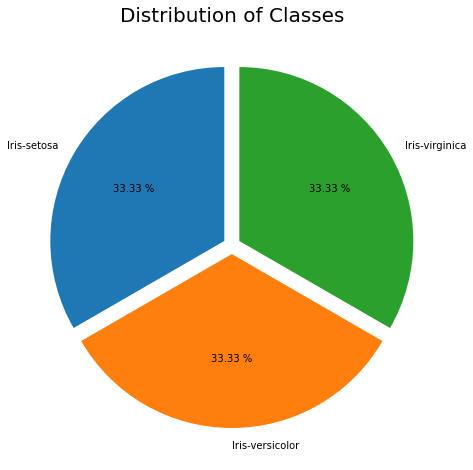

In [7]:
plt.figure(figsize = (8, 8))

count_list = [(df.Species == 'Iris-setosa').sum(), (df.Species == 'Iris-versicolor').sum(), (df.Species == 'Iris-virginica').sum()]
label_list = list(df['Species'].unique())

plt.pie(count_list,
        labels = label_list,
        autopct = "%.2f %%",
        startangle = 90,
        explode = (0.05, 0.05, 0.05))

plt.title('Distribution of Classes', fontsize = 20)
plt.show()

In [8]:
df.shape

(150, 5)

In [9]:
X = df.drop(['Species'], axis=1)
y = df['Species']
# # print(X.head())
print(X.shape)
# # print(y.head())
print(y.shape)
# df.columns


(150, 4)
(150,)


In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Column Species is the dependent variable and of datatype object. This needs to be converted to numeric.

using apply function for the numeric transformation and data type conversion.



In [12]:
df['Species']=df['Species'].apply(lambda x: 0.0 if x== 'Iris-setosa' else 1.0 if x=='Iris-versicolor' else 2.0)

In [13]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [14]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=.2)

For classificaton Logistic Regression gonna be used.

In [16]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=1000)

logRegFitted = logReg.fit(X_train,y_train)
y_pred = logRegFitted.predict(X_test)

Using R^2

In [17]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.9599465954606141


In [18]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
df_seto = df[df['Species'] == 0]
df_versi = df[df['Species'] == 1]
df_virg = df[df['Species'] == 2]

print(df_seto.shape[0], df_versi.shape[0], df_virg.shape[0])

50 50 50


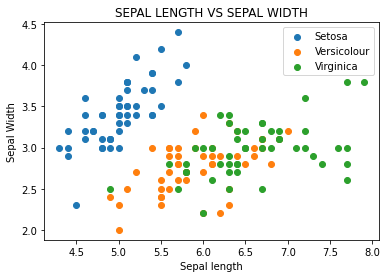

In [20]:
plt.scatter(df_seto['SepalLengthCm'], df_seto['SepalWidthCm'])
plt.scatter(df_versi['SepalLengthCm'], df_versi['SepalWidthCm'])
plt.scatter(df_virg['SepalLengthCm'], df_virg['SepalWidthCm'])

plt.title("SEPAL LENGTH VS SEPAL WIDTH")
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')

plt.legend(['Setosa', 'Versicolour', 'Virginica'])

plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

<AxesSubplot:>

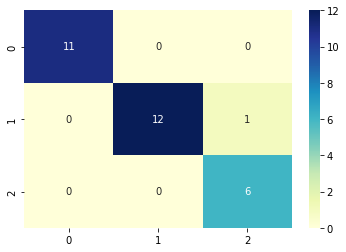

In [27]:
sns.heatmap(cm,cmap="YlGnBu",annot=True)

In [28]:
print('lr: {}'.format(lr.score(X_test, y_test)))
print('kNN: {}'.format(kNN.score(X_test, y_test)))

lr: 0.9666666666666667
kNN: 0.9666666666666667


SVM

In [29]:
pip install SVM

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import sys

# from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [32]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<AxesSubplot:>

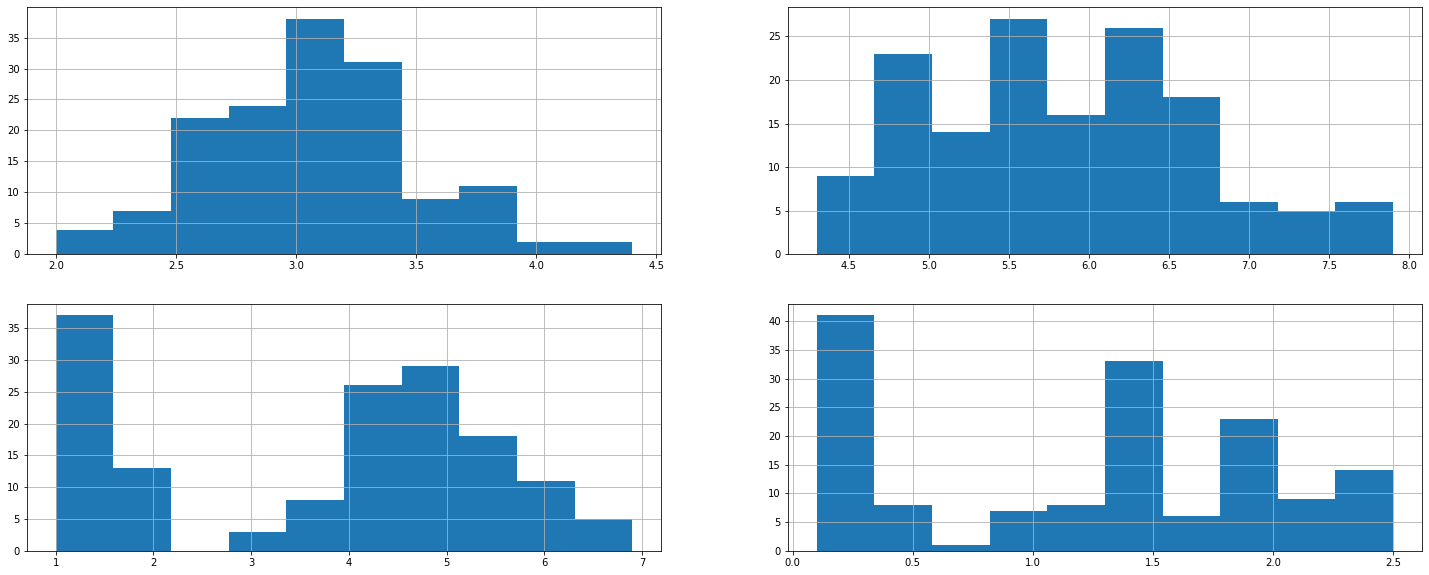

In [76]:
f = plt.figure(figsize=(25,10))
f.add_subplot(221)
X.SepalWidthCm.hist()
f.add_subplot(222)
X.SepalLengthCm.hist()
f.add_subplot(223)
X.PetalLengthCm.hist()
f.add_subplot(224)
X.PetalWidthCm.hist()

Now we will explore outliers in the data using boxplot and zscores methods. We will consider any point with score greater than 2.5 std as an outlier. 

<AxesSubplot:xlabel='PetalWidthCm'>

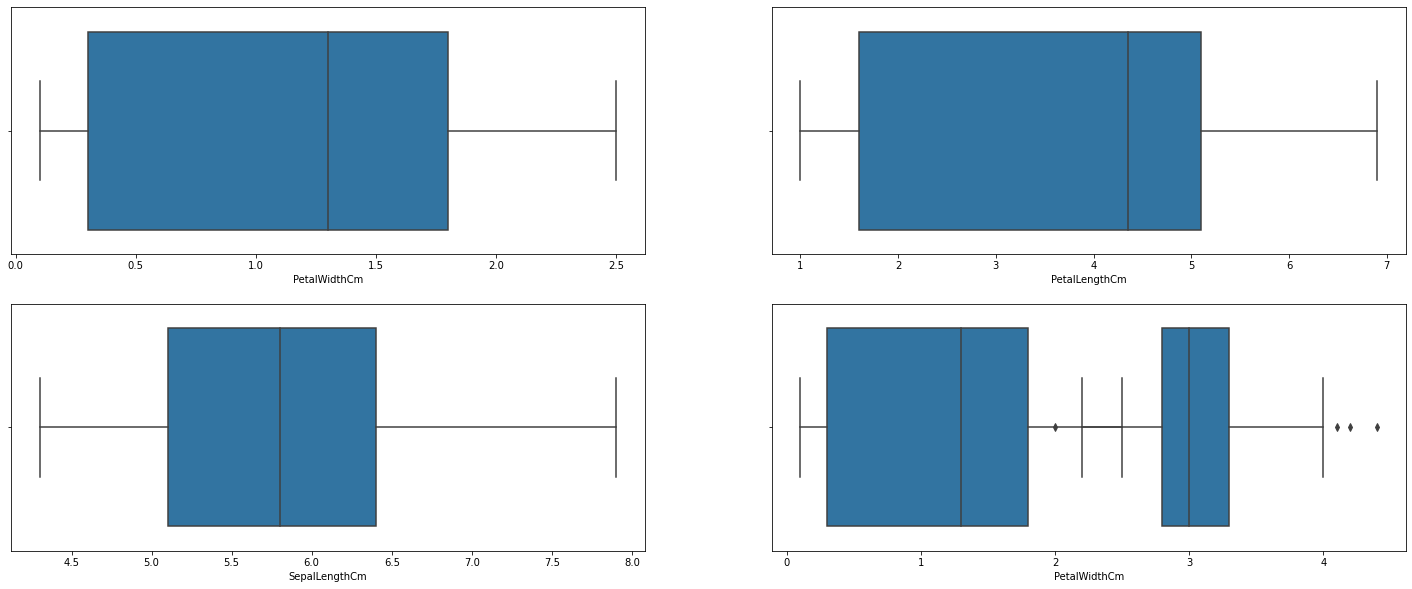

In [77]:
f = plt.figure(figsize=(25,10))
f.add_subplot(221)
sns.boxplot(x=X['PetalWidthCm'])
f.add_subplot(222)
sns.boxplot(x=X['PetalLengthCm'])
f.add_subplot(223)
sns.boxplot(x=X['SepalLengthCm'])
f.add_subplot(224)
sns.boxplot(x=X['SepalWidthCm'])
sns.boxplot(x=X['PetalWidthCm'])

It seems we have some outliers in the petalWidthCm so we will make further outlier analysis using the zscore method

In [78]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(X))
zee = (np.where(z > 2.5))[1]
print("number of data examples greater than 3 standard deviations = %i " % len(zee))

number of data examples greater than 3 standard deviations = 2 


In [79]:
df["Species"].value_counts()

0.0    50
1.0    50
2.0    50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

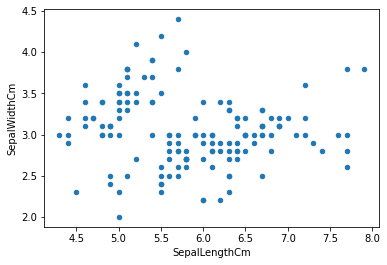

In [81]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

/home/msc2/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


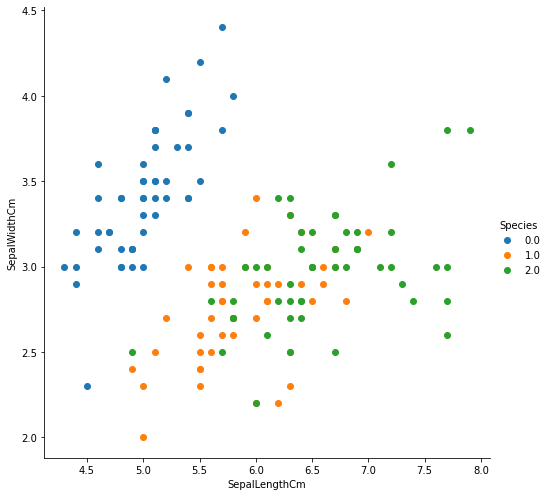

In [85]:
sns.FacetGrid(df, hue="Species", size=7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

/home/msc2/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


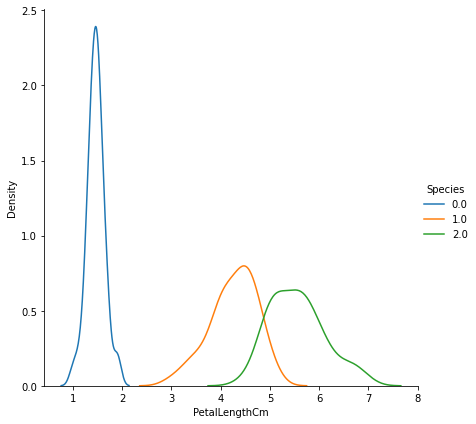

In [84]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

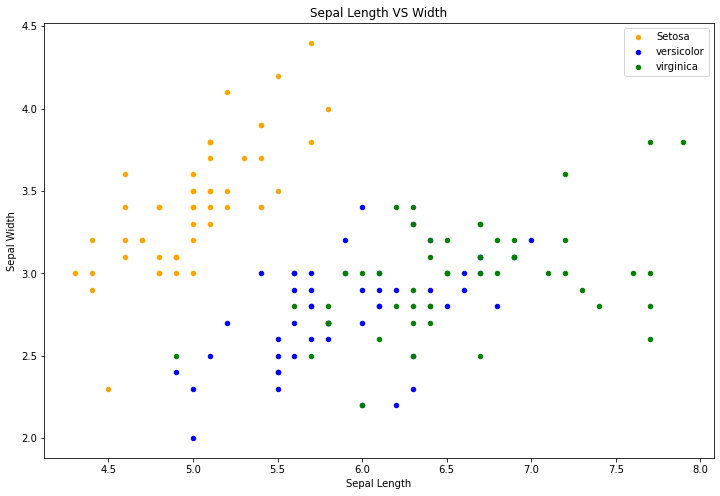

In [ ]:
fig = df[df.Species== 0].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species== 1].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species== 2].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf() # get the current figure 
fig.set_size_inches(12,8)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

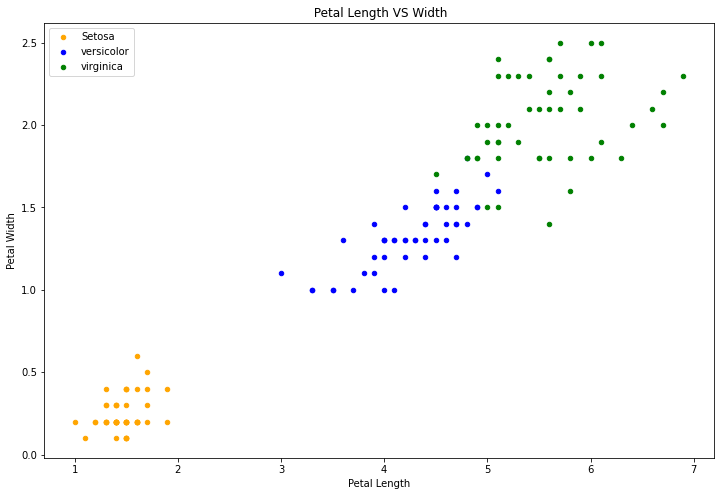

In [41]:
fig = df[df.Species== 0].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species== 1].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species== 2].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

we can see that the Petal Features are giving a better cluster division compared to the Sepal. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

In [42]:
df.shape

(150, 5)

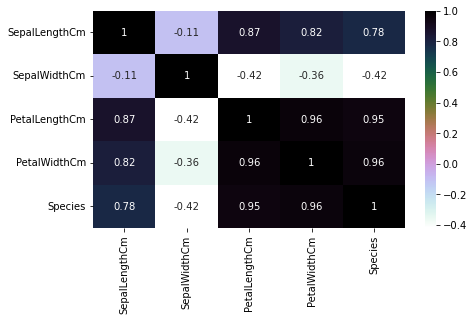

In [43]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

In [46]:
train, test = train_test_split(df, test_size = 0.3)
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print("train datset",train.shape)
print("test dataset",test.shape)

train datset (105, 5)
test dataset (45, 5)


In [47]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [49]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
9,4.9,3.1,1.5,0.1
31,5.4,3.4,1.5,0.4
37,4.9,3.1,1.5,0.1
142,5.8,2.7,5.1,1.9


In [50]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
85,6.0,3.4,4.5,1.6
11,4.8,3.4,1.6,0.2
23,5.1,3.3,1.7,0.5
52,6.9,3.1,4.9,1.5
71,6.1,2.8,4.0,1.3


In [51]:
train_y.head()

22     0.0
9      0.0
31     0.0
37     0.0
142    2.0
Name: Species, dtype: float64

In [53]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
9,4.9,3.1,1.5,0.1
31,5.4,3.4,1.5,0.4
37,4.9,3.1,1.5,0.1
142,5.8,2.7,5.1,1.9


# Support Vector Machine (SVM)

In [57]:

from sklearn.linear_model import LogisticRegression  
# from sklearn.cross_validation import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics 

In [59]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y)
prediction=model.predict(test_X) 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9777777777777777


# Logistic Regression

In [60]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


/home/msc2/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


# K-Nearest Neighbours

In [63]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


# n-K nearest nighbours

/tmp/ipykernel_5765/2122472731.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
/tmp/ipykernel_5765/2122472731.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
/tmp/ipykernel_5765/2122472731.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
/tmp/ipykernel_5765/2122472731.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
/tmp/ipykernel_5765/2122472731.py:8: FutureWarning: The series.append me

([<matplotlib.axis.XTick at 0x7fd2a0431fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

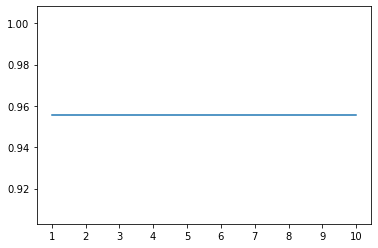

In [65]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [69]:
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [68]:
plot_decision_regions(X_test_std, y_test, svm)

NameError: name 'X_test_std' is not defined